<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import sys
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds
from zipfile import ZipFile
import os
import numpy as np
import matplotlib.pyplot as plt
import bfseg.models.fast_scnn
import bfseg.data.hive.office_rumlang_validation_labeled
import bfseg.data.hive.bfseg_validation_labeled
from bfseg.utils.utils import load_gdrive_file
#from bfseg.settings import TMPDIR
TMPDIR = "/home/matthias/data/rss_2021_data/tmp/"
MASKPATH = "/home/matthias/data/rss_2021_data/mask.png"

Segmentation Models: using `tf.keras` framework.


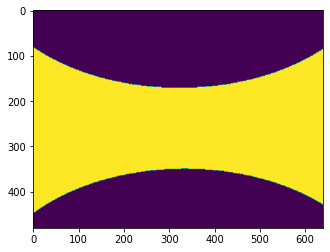

In [2]:
# Load mask
mask = plt.imread(MASKPATH)
ax = plt.subplot()
ax.imshow(mask)
mask_filtered = np.nonzero(mask)
test = mask[mask_filtered]

## Untrained

In [133]:
model0 = tf.keras.models.load_model('/home/matthias/data/rss_2021_data/xavier_models/18_full/model_epoch_initial.h5')

In [134]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='RUMLANG').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model0(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.27610642>

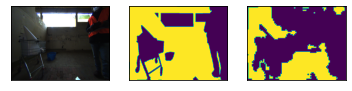

In [150]:
ds_rumlang = tfds.load('office_rumlang_validation_labeled', split='RUMLANG')
c = 0
for entry in ds_rumlang.take(3):
    c+=1
    if c != 3:
        continue
    ax1 = plt.subplot(1,3,1)
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    plt.imshow(entry['image'])
    ax2 = plt.subplot(1,3,2)
    ax2.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    plt.imshow(entry['label'])
    a = tf.image.convert_image_dtype(tf.expand_dims(entry['image'],axis=0), tf.float32)
    b = model0(a)
    pred = tf.argmax(b[1], axis=-1)
    ax3 = plt.subplot(1,3,3)
    ax3.get_yaxis().set_visible(False)
    ax3.get_xaxis().set_visible(False)
    plt.imshow(pred[0,:,:])
    

## Full (standard localization)

In [143]:
model1 = tf.keras.models.load_model('/home/matthias/data/rss_2021_data/xavier_models/18_full/model_epoch_12.h5')

In [144]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='RUMLANG').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model1(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.505292>

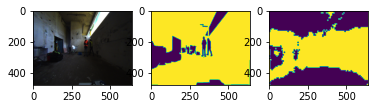

In [149]:
ds_rumlang = tfds.load('office_rumlang_validation_labeled', split='RUMLANG')
for entry in ds_rumlang.take(1):
    plt.subplot(1,3,1)
    plt.imshow(entry['image'])
    plt.subplot(1,3,2)
    plt.imshow(entry['label'])
    a = tf.image.convert_image_dtype(tf.expand_dims(entry['image'],axis=0), tf.float32)
    b = model1(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])
    

## Full Dyn (Realsense localization)

In [57]:
model2 = tf.keras.models.load_model('/home/matthias/data/rss_2021_data/xavier_models/19_dyn_preliminary/model_epoch_20.h5')

In [58]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='RUMLANG').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5466626>

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launche

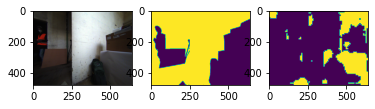

In [152]:
ds_rumlang = tfds.load('office_rumlang_validation_labeled', split='RUMLANG')
for entry in ds_rumlang.take(2):
    plt.subplot(1,3,1)
    plt.imshow(entry['image'])
    plt.subplot(1,3,2)
    plt.imshow(entry['label'])
    a = tf.image.convert_image_dtype(tf.expand_dims(entry['image'],axis=0), tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])
    

# Dense Labels

## Office Initial

In [224]:
model2 = tf.keras.models.load_model('/home/matthias/data/rss_2021_data/xavier_models/office3_dense20_dyn_complete_1/model_epoch_initial.h5')

In [225]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='OFFICE').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.46462882>

In [226]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='OFFICE').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.46285713>

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launche

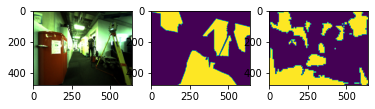

In [227]:
ds_rumlang = tfds.load('office_rumlang_validation_labeled', split='OFFICE')
for entry in ds_rumlang.take(3):
    plt.subplot(1,3,1)
    plt.imshow(entry['image'])
    plt.subplot(1,3,2)
    plt.imshow(entry['label'])
    a = tf.image.convert_image_dtype(tf.expand_dims(entry['image'],axis=0), tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])

### Validation on Office 12

In [228]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
count = 0
max_count = 20 # Number of Validation images
for batch in tfds.load('MeshdistPseudolabelsDense1', split='office12_dense20_dyn_complete').batch(1):
    resized_images = tf.image.resize(batch['image'], [480,640])
    resized_labels = tf.image.resize(batch['label'], [480,640])

    zero_mask =np.full((1,480,640,1), 0.0).astype("float32")
    zero_mask =tf.constant(zero_mask)
    one_mask =np.full((1,480,640,1), 1.0).astype("float32")
    one_mask =tf.constant(one_mask)
    
    final_mask=tf.where(resized_labels == 2, zero_mask, one_mask)
    final_mask = final_mask.numpy()[0,:,:,0]
    
    resized_labels = tf.cast(tf.where(resized_labels == 2, zero_mask, resized_labels), tf.uint8)

    a = tf.image.convert_image_dtype(resized_images, tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)

    miou.update_state(resized_labels, pred, final_mask)
    count += 1
    if count == max_count:
        break
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.37382758>

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding 

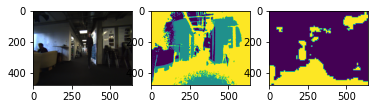

In [229]:
ds_office12 = tfds.load('MeshdistPseudolabelsDense1', split='office12_dense20_dyn_complete')
for entry in ds_office12.take(5):
    image = entry['image']/255
    image = tf.image.resize(image, [480,640])
    label = entry['label']
    label = tf.image.resize(label, [480,640])
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.subplot(1,3,2)
    plt.imshow(label)
    a = tf.image.convert_image_dtype(tf.expand_dims(image,axis=0), tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])

## Office 3 Dense 20 (model gets better)

In [181]:
model2 = tf.keras.models.load_model('/home/matthias/data/rss_2021_data/xavier_models/office3_dense20_dyn_complete_1/model_epoch_5.h5')

In [113]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='OFFICE').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.49114203>

In [218]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='OFFICE').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.53413224>

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launche

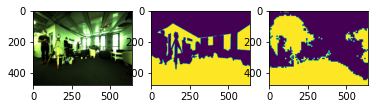

In [219]:
ds_rumlang = tfds.load('office_rumlang_validation_labeled', split='OFFICE')
for entry in ds_rumlang.take(4):
    plt.subplot(1,3,1)
    plt.imshow(entry['image'])
    plt.subplot(1,3,2)
    plt.imshow(entry['label'])
    a = tf.image.convert_image_dtype(tf.expand_dims(entry['image'],axis=0), tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])

### Validation on Office 12

In [222]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
count = 0
max_count = 20 # Number of Validation images
for batch in tfds.load('MeshdistPseudolabelsDense1', split='office12_dense20_dyn_complete').batch(1):
    resized_images = tf.image.resize(batch['image'], [480,640])
    resized_labels = tf.image.resize(batch['label'], [480,640])

    zero_mask =np.full((1,480,640,1), 0.0).astype("float32")
    zero_mask =tf.constant(zero_mask)
    one_mask =np.full((1,480,640,1), 1.0).astype("float32")
    one_mask =tf.constant(one_mask)
    
    final_mask=tf.where(resized_labels == 2, zero_mask, one_mask)
    final_mask = final_mask.numpy()[0,:,:,0]
    
    resized_labels = tf.cast(tf.where(resized_labels == 2, zero_mask, resized_labels), tf.uint8)

    a = tf.image.convert_image_dtype(resized_images, tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)

    miou.update_state(resized_labels, pred, final_mask)
    count += 1
    if count == max_count:
        break
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6201721>

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding 

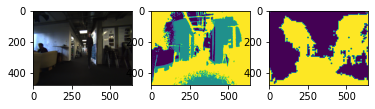

In [180]:
ds_office12 = tfds.load('MeshdistPseudolabelsDense1', split='office12_dense20_dyn_complete')
for entry in ds_office12.take(5):
    image = entry['image']/255
    image = tf.image.resize(image, [480,640])
    label = entry['label']
    label = tf.image.resize(label, [480,640])
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.subplot(1,3,2)
    plt.imshow(label)
    a = tf.image.convert_image_dtype(tf.expand_dims(image,axis=0), tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])

## Office 12 Dense 20 (model gets worse, probably not enough data?)

In [231]:
model2 = tf.keras.models.load_model('/home/matthias/data/rss_2021_data/xavier_models/office12_dense20_dyn_complete_1/model_epoch_5.h5')

In [232]:
iou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='OFFICE').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.41671437>

In [233]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='OFFICE').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.46116173>

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launche

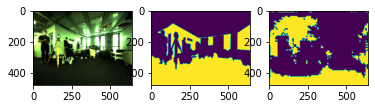

In [234]:
ds_rumlang = tfds.load('office_rumlang_validation_labeled', split='OFFICE')
for entry in ds_rumlang.take(4):
    plt.subplot(1,3,1)
    plt.imshow(entry['image'])
    plt.subplot(1,3,2)
    plt.imshow(entry['label'])
    a = tf.image.convert_image_dtype(tf.expand_dims(entry['image'],axis=0), tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])

### Validation on Office 12

In [235]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
count = 0
max_count = 20 # Number of Validation images
for batch in tfds.load('MeshdistPseudolabelsDense1', split='office12_dense20_dyn_complete').batch(1):
    resized_images = tf.image.resize(batch['image'], [480,640])
    resized_labels = tf.image.resize(batch['label'], [480,640])

    zero_mask =np.full((1,480,640,1), 0.0).astype("float32")
    zero_mask =tf.constant(zero_mask)
    one_mask =np.full((1,480,640,1), 1.0).astype("float32")
    one_mask =tf.constant(one_mask)
    
    final_mask=tf.where(resized_labels == 2, zero_mask, one_mask)
    final_mask = final_mask.numpy()[0,:,:,0]
    
    resized_labels = tf.cast(tf.where(resized_labels == 2, zero_mask, resized_labels), tf.uint8)

    a = tf.image.convert_image_dtype(resized_images, tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)

    miou.update_state(resized_labels, pred, final_mask)
    count += 1
    if count == max_count:
        break
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6161385>

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding 

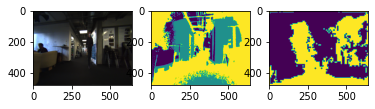

In [236]:
ds_office12 = tfds.load('MeshdistPseudolabelsDense1', split='office12_dense20_dyn_complete')
for entry in ds_office12.take(5):
    image = entry['image']/255
    image = tf.image.resize(image, [480,640])
    label = entry['label']
    label = tf.image.resize(label, [480,640])
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.subplot(1,3,2)
    plt.imshow(label)
    a = tf.image.convert_image_dtype(tf.expand_dims(image,axis=0), tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])

## Office 12 Sparse 50 (model gets worse)

In [77]:
model2 = tf.keras.models.load_model('/home/matthias/data/rss_2021_data/xavier_models/office12_sparse50_dyn_complete_1/model_epoch_0.h5')

In [78]:
iou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='OFFICE').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.40273583>

In [79]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='OFFICE').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.41862544>

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launche

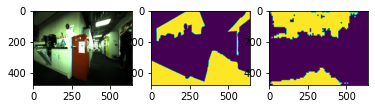

In [73]:
ds_rumlang = tfds.load('office_rumlang_validation_labeled', split='OFFICE')
for entry in ds_rumlang.take(2):
    plt.subplot(1,3,1)
    plt.imshow(entry['image'])
    plt.subplot(1,3,2)
    plt.imshow(entry['label'])
    a = tf.image.convert_image_dtype(tf.expand_dims(entry['image'],axis=0), tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])

### Office 3 Sparse 50 (model gets worse)

In [92]:
model2 = tf.keras.models.load_model('/home/matthias/data/rss_2021_data/xavier_models/office3_sparse50_dyn_complete_1/model_epoch_10.h5')

In [93]:
iou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='OFFICE').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.3997295>

In [94]:
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in tfds.load('office_rumlang_validation_labeled', split='OFFICE').batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred)
miou.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.40839332>

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launche

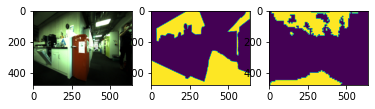

In [88]:
ds_rumlang = tfds.load('office_rumlang_validation_labeled', split='OFFICE')
for entry in ds_rumlang.take(2):
    plt.subplot(1,3,1)
    plt.imshow(entry['image'])
    plt.subplot(1,3,2)
    plt.imshow(entry['label'])
    a = tf.image.convert_image_dtype(tf.expand_dims(entry['image'],axis=0), tf.float32)
    b = model2(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])